In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


In [6]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
query=session.query(Measurement).order_by(Measurement.date.desc()).first()
query.date

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


'2017-08-23'

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

last_date = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()


In [12]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date 
last_date_df = pd.DataFrame(last_date, columns= ['date', 'precipitation'])
last_date_df
last_date_final_df = last_date_df.set_index("date")
last_date_final_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


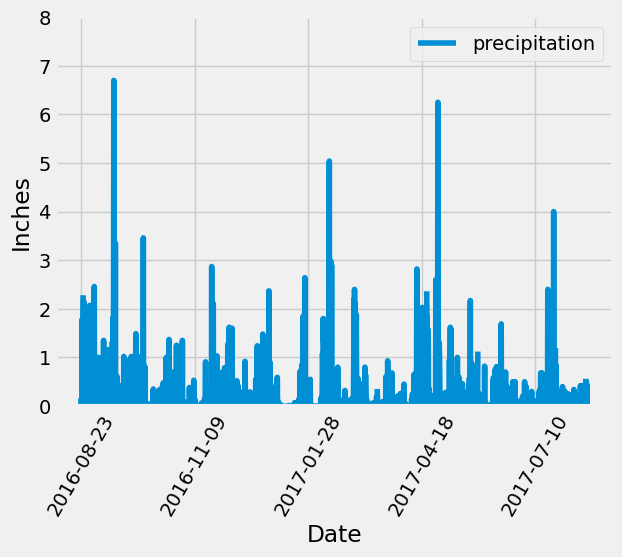

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
last_date_final_df.plot()
plt.ylim(0,8)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Inches')
#plt.tight_layout()
plt.show()



In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_date_final_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_number_stations= session.query(Station.station).count()
total_number_stations

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stat = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
active_stations = active_stat.all()
most_active_stat = active_stat.first()[0]
active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs), ).\
    filter(Measurement.station  == 'USC00519281').all()
sel

[(54.0, 85.0, 71.66378066378067)]

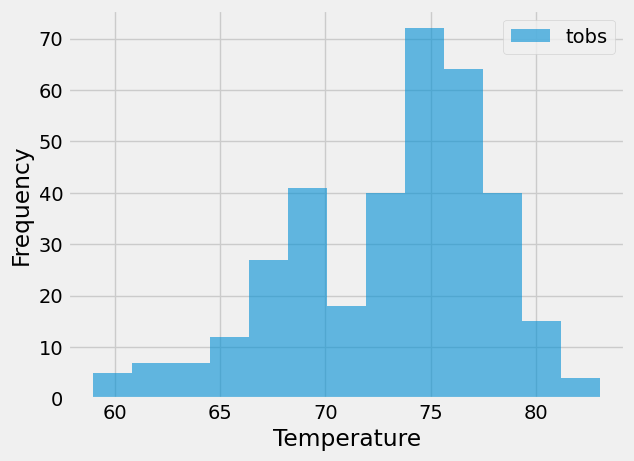

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tem = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").order_by(Measurement.date)

# Convert to DF
station_tem_df = pd.DataFrame(station_tem, columns= ['date', 'tobs'])
#station_temp_df.head()

station_tem_df.plot.hist(bins=13, alpha=0.6)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [19]:
# Close Session
session.close()